In [352]:
import pandas as pd
all_data = pd.read_csv('./all_data.csv')
all_data = all_data.groupby(['date','user_id']).mean().reset_index()
ques_morning_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_morning_dams.csv')
ques_evening_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_evening_dams.csv')

ques_morning_dams = ques_morning_dams[['user_id','date','positive_score','depressive_score','anxious_score']]
ques_evening_dams = ques_evening_dams[['user_id','date','positive_score','depressive_score','anxious_score']]

In [353]:
all_data_use = all_data[['user_id','date','食事','単独作業', '趣味・休憩', '家事・育児', '休憩（業務時間内）', '移動', 'web会議', 'その他', '業務外作業','対面会議', '共同作業（コミュニケーションを伴う）', '電話（会議）','age','sex','管理者兼作業者', '企画業務', 'ノンコア業務（自身が本来担当ではない業務）', '管理者','比較的慣れており，定型化できている業務', 'コア業務（自身が本来担当している業務）', '共同作業者', '開発業務', '管理業務','作業者/参加者', '管理の業務', '比較的新規性が高く，試行錯誤を伴う定型化できていない業務', '営業業務','事務業務（サポート業務、経理業務など）', '現場業務（主に肉体労働を伴うもの）', '現場（主に肉体労働を伴うもの）', '家（その他）','どちらでもない', '一人', '家（書斎など執務向けの場所）', '他者あり（同僚など）', '家（リビングなど）', '快適','職場外のワークスペース', '他者あり（無干渉）', '他者あり（同僚）', '職場', '他者あり（家族など）', '店/外', '不快','非常に快適', '職場外ワークスペース', '非常に不快']]
cluster_data = pd.merge(all_data_use, ques_morning_dams, on=['user_id','date'])
cluster_data = pd.merge(cluster_data, ques_evening_dams, on=['user_id','date'])

In [354]:
cluster_data=cluster_data.rename(columns={'食事':'meals','単独作業':'working_alone', '趣味・休憩':'hobbies/breaks', '家事・育児':'housework/childcare', '休憩（業務時間内）':'breaks(induty)', '移動':'travel', 'web会議':'web_conference', 'その他':'other', '業務外作業':'non_work','対面会議':'facettoface_meetings', '共同作業（コミュニケーションを伴う）':'collaborative_work', '電話（会議）':'telephone(conference)','管理者兼作業者':'manager_and_operator','企画業務':'planning_tasks','ノンコア業務（自身が本来担当ではない業務）':'noncore_tasks','管理者':'manager','比較的慣れており，定型化できている業務':'standardized_tasks','コア業務（自身が本来担当している業務）':'core_tasks','共同作業者':'collaborators','開発業務':'development_tasks','管理業務':'manager_tasks','作業者/参加者':'operator/paticipants','管理の業務':'management_tasks','比較的新規性が高く，試行錯誤を伴う定型化できていない業務':'non_standardized_tasks','営業業務':'sales_tasks','事務業務（サポート業務、経理業務など）':'office_tasks','現場業務（主に肉体労働を伴うもの）':'field_tasks','現場（主に肉体労働を伴うもの）':'field','家（その他）':'home(other)','どちらでもない':'neither','一人':'alone','家（書斎など執務向けの場所）':'home(placeforwork)','他者あり（同僚など）':'with_others(colleagues_and)','家（リビングなど）':'home(living)','快適':'comfortable','職場外のワークスペース':'workspace_outside','他者あり（無干渉）':'with_others(nointeraction)','他者あり（同僚）':'with_others(colleagues)','職場':'workplace','他者あり（家族など）':'with_others(family)','店/外':'store/outside','不快':'uncomfortable','非常に快適':'very_comfortable','職場外ワークスペース':'workplace_outside_office','非常に不快':'extremely_uncomfortable'})

print(cluster_data)
task_df = cluster_data[['meals','working_alone', 'hobbies/breaks', 'housework/childcare', 'breaks(induty)', 'travel', 'web_conference', 'other', 'non_work','facettoface_meetings', 'collaborative_work', 'telephone(conference)',
'manager_and_operator','planning_tasks','noncore_tasks','manager','standardized_tasks','core_tasks','collaborators','development_tasks','manager_tasks','operator/paticipants','management_tasks','non_standardized_tasks','sales_tasks','office_tasks','field_tasks','field','home(other)','neither','alone','home(placeforwork)','with_others(colleagues_and)','home(living)','comfortable','workspace_outside','with_others(nointeraction)','with_others(colleagues)','workplace','with_others(family)','store/outside','uncomfortable','very_comfortable','workplace_outside_office','extremely_uncomfortable']]


# cluster_data.loc[cluster_data['meals']<0, 'meals']=0
# cluster_data.loc[cluster_data['working_alone']<0, 'working_alone']=0
# cluster_data.loc[cluster_data['hobbies/breaks']<0, 'hobbies/breaks']=0
# cluster_data.loc[cluster_data['housework/childcare']<0, 'housework/childcare']=0
# cluster_data.loc[cluster_data['breaks(induty)']<0, 'breaks(induty)']=0
# cluster_data.loc[cluster_data['travel']<0, 'travel']=0
# cluster_data.loc[cluster_data['web_conference']<0, 'web_conference']=0
# cluster_data.loc[cluster_data['other']<0, 'other']=0
# cluster_data.loc[cluster_data['non_work']<0, 'non_work']=0
# cluster_data.loc[cluster_data['facettoface_meetings']<0, 'facettoface_meetings']=0
# cluster_data.loc[cluster_data['collaborative_work']<0, 'collaborative_work']=0
# cluster_data.loc[cluster_data['telephone(conference)']<0, 'telephone(conference)']=0
cluster_data['age']=cluster_data['age'].fillna(43)



     user_id        date      meals  working_alone  hobbies/breaks  \
0          7  2021-01-12   0.044983       0.000000        0.000000   
1          8  2021-01-12   6.866667       0.000000       45.633333   
2         10  2021-01-12   0.010333       0.000000        0.000000   
3         12  2021-01-12   7.967950       0.000000        0.000000   
4         13  2021-01-12  57.242667       0.000000        0.000000   
..       ...         ...        ...            ...             ...   
892       96  2021-01-29  63.356767     322.150000      223.162050   
893       98  2021-01-29   0.000000     343.000000        0.000000   
894       99  2021-01-29   5.000000     478.366667      312.000000   
895      103  2021-01-29  88.315550     471.756250        0.000000   
896      104  2021-01-29  11.133333     476.733900       32.400000   

     housework/childcare  breaks(induty)      travel  web_conference  \
0                 0.0000         0.00000   30.000000        0.000000   
1              

In [355]:
def replace_under_zero(df):
    columns = list(df.columns)
    columns.remove('date')
    columns.remove('user_id')
    df = df.fillna(0)
    for i in range(len(columns)):
        print(columns[i])
        df.loc[df[columns[i]]<0, columns[i]]=0
    return df
cluster_data = replace_under_zero(cluster_data)

meals
working_alone
hobbies/breaks
housework/childcare
breaks(induty)
travel
web_conference
other
non_work
facettoface_meetings
collaborative_work
telephone(conference)
age
sex
manager_and_operator
planning_tasks
noncore_tasks
manager
standardized_tasks
core_tasks
collaborators
development_tasks
manager_tasks
operator/paticipants
management_tasks
non_standardized_tasks
sales_tasks
office_tasks
field_tasks
field
home(other)
neither
alone
home(placeforwork)
with_others(colleagues_and)
home(living)
comfortable
workspace_outside
with_others(nointeraction)
with_others(colleagues)
workplace
with_others(family)
store/outside
uncomfortable
very_comfortable
workplace_outside_office
extremely_uncomfortable
positive_score_x
depressive_score_x
anxious_score_x
positive_score_y
depressive_score_y
anxious_score_y


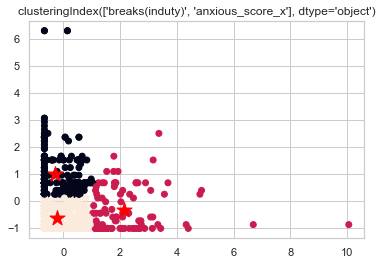

In [356]:
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np
import japanize_matplotlib

X=cluster_data[[
   #   'meals',
   #  'working_alone', 
   #  'hobbies/breaks', 
   #  'housework/childcare', 
    'breaks(induty)', 
   #  'travel', 
   #  'web_conference', 
   #  'other', 
   #  'non_work',
   #  'facettoface_meetings', 
   #  'collaborative_work', 
   #  'telephone(conference)',
      #   'age',
      #  'sex',
    #      'コア業務（自身が本来担当している業務）', 'ノンコア業務（自身が本来担当ではない業務）',
      #  'positive_score_x'
      #  'depressive_score_x', 
    'anxious_score_x',
    #    'positive_score_y', 'depressive_score_y', 'anxious_score_y'
       ]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)
# クラスタリング
cls = KMeans(n_clusters=3)
result = cls.fit(X_norm)
# 結果を出力
columns=X.columns
plt.title('clustering{}'.format(columns))
plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show()

In [357]:
from sklearn import datasets, preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

from pyclustering.cluster import gmeans, xmeans
import itertools

In [358]:
X=cluster_data[[
    # 'meals',
    'working_alone'
    # 'hobbies/breaks', 
    # 'housework/childcare',
    # 'breaks(induty)',
    # 'travel',
    # 'web_conference',
    # 'other', 
    # 'non_work',
    # 'facettoface_meetings',
    # 'collaborative_work', 
    # 'telephone(conference)'
       ]]
Y=cluster_data[[       'positive_score_x'
    #    'depressive_score_x', 'anxious_score_x',
    #    'positive_score_y', 'depressive_score_y', 'anxious_score_y'
    ]]

## Xmeans法を用いたクラスタリング

In [359]:
#　pcaで次元圧縮
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vecs_list=pca.fit_transform(X)

# # 元データをプロット
# fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=Y)
# fig.show()

pred = KMeans(n_clusters=8).fit_predict(X)

# k-meansによるクラスタをプロット
x_columns = X.columns
y_columns = Y.columns
fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=pred,
                title='y:{0},x:{1}'.format(y_columns,x_columns))
fig.update_layout(font={"family":"Meiryo", "size":8})
fig.show()

# X-means
xmeans_instance = xmeans.xmeans(X).process()

clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()

labels_size = len(
    list(itertools.chain.from_iterable(clusters))
)
labels = np.zeros((1, labels_size))
for n, n_th_cluster in np.ndenumerate(clusters):
    for img_num in n_th_cluster:
        labels[0][img_num] = n[0]
labels = labels.ravel()

# x-meansによるクラスタをプロット
fig = px.scatter(x=vecs_list[:, 0], y=vecs_list[:, 1], color=labels,
                      title='y:{0},x:{1}'.format(y_columns,x_columns))
fig.update_layout(font={"family":"Meiryo", "size":8})
fig.show()


ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

## 階層クラスタリング

In [369]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline
import datetime

In [370]:
cluster_data.query('user_id == 74')

,user_id,date,meals,working_alone,hobbies/breaks,housework/childcare,breaks(induty),travel,web_conference,other,...,very_comfortable,workplace_outside_office,extremely_uncomfortable,positive_score_x,depressive_score_x,anxious_score_x,positive_score_y,depressive_score_y,anxious_score_y,dayofweek
93,74,2021-01-13,0.000000,294.521583,57.433333,157.000000,132.983333,0.000000,200.000000,0.0,...,0.0,0.0,0.0,2.333333,2.333333,2.333333,3.000000,0.666667,1.333333,2
168,74,2021-01-14,0.000000,234.797117,256.950000,118.083333,16.866667,69.447933,58.000000,0.0,...,0.0,0.0,0.0,1.333333,2.333333,1.333333,1.000000,1.000000,1.666667,3
235,74,2021-01-15,24.000000,64.566667,92.700000,57.000000,41.000000,0.000000,200.000000,0.0,...,0.0,0.0,0.0,1.333333,0.333333,1.000000,1.666667,1.333333,1.333333,4
334,74,2021-01-18,0.000000,34.516667,60.416667,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.333333,1.333333,0.000000,0
443,74,2021-01-20,0.000000,404.333333,75.233333,80.000000,64.000000,0.000000,200.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,2
564,74,2021-01-22,0.000000,104.800000,0.000000,0.000000,24.000000,31.959250,121.365317,0.0,...,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.666667,0.000000,0.000000,4
650,74,2021-01-25,0.000000,0.000000,51.449167,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.333333,0.000000,0.333333,0.666667,0.000000,0
704,74,2021-01-26,0.022133,251.841350,0.000000,142.121833,61.000000,0.000000,200.000000,0.0,...,0.0,0.0,0.0,0.666667,1.333333,0.000000,0.333333,0.000000,0.000000,1
877,74,2021-01-29,0.000000,0.000000,0.000000,0.017217,187.565317,21.585150,200.000000,0.0,...,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,4


# 階層クラスタリングと可視化をまとめたやつ

In [371]:
night_w_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_dams.csv')
night_w_dams = night_w_dams[['user_id','date','positive_score','depressive_score','anxious_score']]

night_w_bodyfatigue = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_bodyfatigue.csv')
night_w_bodyfatigue = night_w_bodyfatigue[['user_id','date','value_nemuke','value_hukai','value_boyake']]

night_w_productivity = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_productivity.csv')
night_w_productivity = night_w_productivity[['user_id','date','value_productivity','study_new','decide_doing','paformance','absent_by_problem']]
night_w_productivity['value_productivity'] = night_w_productivity['value_productivity']/4

night_w_recover = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_recover.csv')
night_w_recover = night_w_recover[['user_id','date','value_recover']]
night_w_recover['value_recover'] = night_w_recover['value_recover']/2

night_w_workenga = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_workenga.csv')
night_w_workenga = night_w_workenga[['user_id','date','workenga_score']]

night_w_eval = pd.read_csv('../../datas/preprocessed_questionaire/ques_night_w_eval.csv')
night_w_eval = night_w_eval[['user_id','date','syutyu','kouritu','yoteidori','jubun_comu','kouritu_comu','idea','seika','value_eval']]
night_w_eval['value_eval'] = night_w_eval['value_eval']/7

mor_bodyfatigue = pd.read_csv('../../datas/preprocessed_questionaire/ques_morning_bodyfatigue.csv')
mor_bodyfatigue = mor_bodyfatigue[['user_id','date','value_nemuke','value_hukai','value_boyake']]

mor_dams = pd.read_csv('../../datas/preprocessed_questionaire/ques_morning_dams.csv')
mor_dams = mor_dams[['user_id','date','positive_score','depressive_score','anxious_score']]


merge_night_w = pd.merge(night_w_dams, night_w_bodyfatigue, on=['user_id','date'],how='outer')
merge_night_w = pd.merge(merge_night_w, night_w_productivity, on=['user_id','date'],how='outer')
merge_night_w = pd.merge(merge_night_w, night_w_recover, on=['user_id','date'],how='outer')
merge_night_w = pd.merge(merge_night_w, night_w_workenga, on=['user_id','date'],how='outer')
merge_night_w = pd.merge(merge_night_w, night_w_eval, on=['user_id','date'],how='outer')

merge_mor = pd.merge(mor_dams,mor_bodyfatigue,on=['user_id','date'],how='outer')
merge_mor['date'] = pd.to_datetime(merge_mor['date'])-datetime.timedelta(days=1)

merge_night_w = merge_night_w.rename(columns={'value_nemuke':'sleepiness_score','value_hukai':'drowsiness_score','value_boyake':'sluggishness_score','value_productivity':'productivity_score','value_recover':'recovery_score','syutyu':'focus_work','kouritu':'efficient_work','yoteidori':'on_schedule','jubun_comu':'communicate_well','kouritu_comu':'communicate_effectively','idea':'new_idea','seika':'reache_result'})

merge_mor = merge_mor.rename(columns={'value_nemuke':'sleepiness_score','value_hukai':'drowsiness_score','value_boyake':'sluggishness_score'})

In [372]:
# merge_night_w.to_csv('./clustering_data/merge_night_w.csv')
# merge_mor.to_csv('./clustering_data/merge_mor.csv')

#外れ値の処理
cluster_data.loc[cluster_data['hobbies/breaks']>600, 'hobbies/breaks']=600
cluster_data.loc[cluster_data['meals']>180, 'meals']=180
cluster_data.loc[cluster_data['web_conference']>200, 'web_conference']=200
cluster_data.loc[cluster_data['housework/childcare']>180, 'housework/childcare']=180
cluster_data.loc[cluster_data['working_alone']>1000, 'working_alone']=1000

#平日と休日を分ける
cluster_data['dayofweek'] = pd.to_datetime(cluster_data['date']).dt.dayofweek
cluster_data_w = cluster_data[cluster_data['dayofweek']<5]
cluster_data_h = cluster_data[cluster_data['dayofweek']>=5]



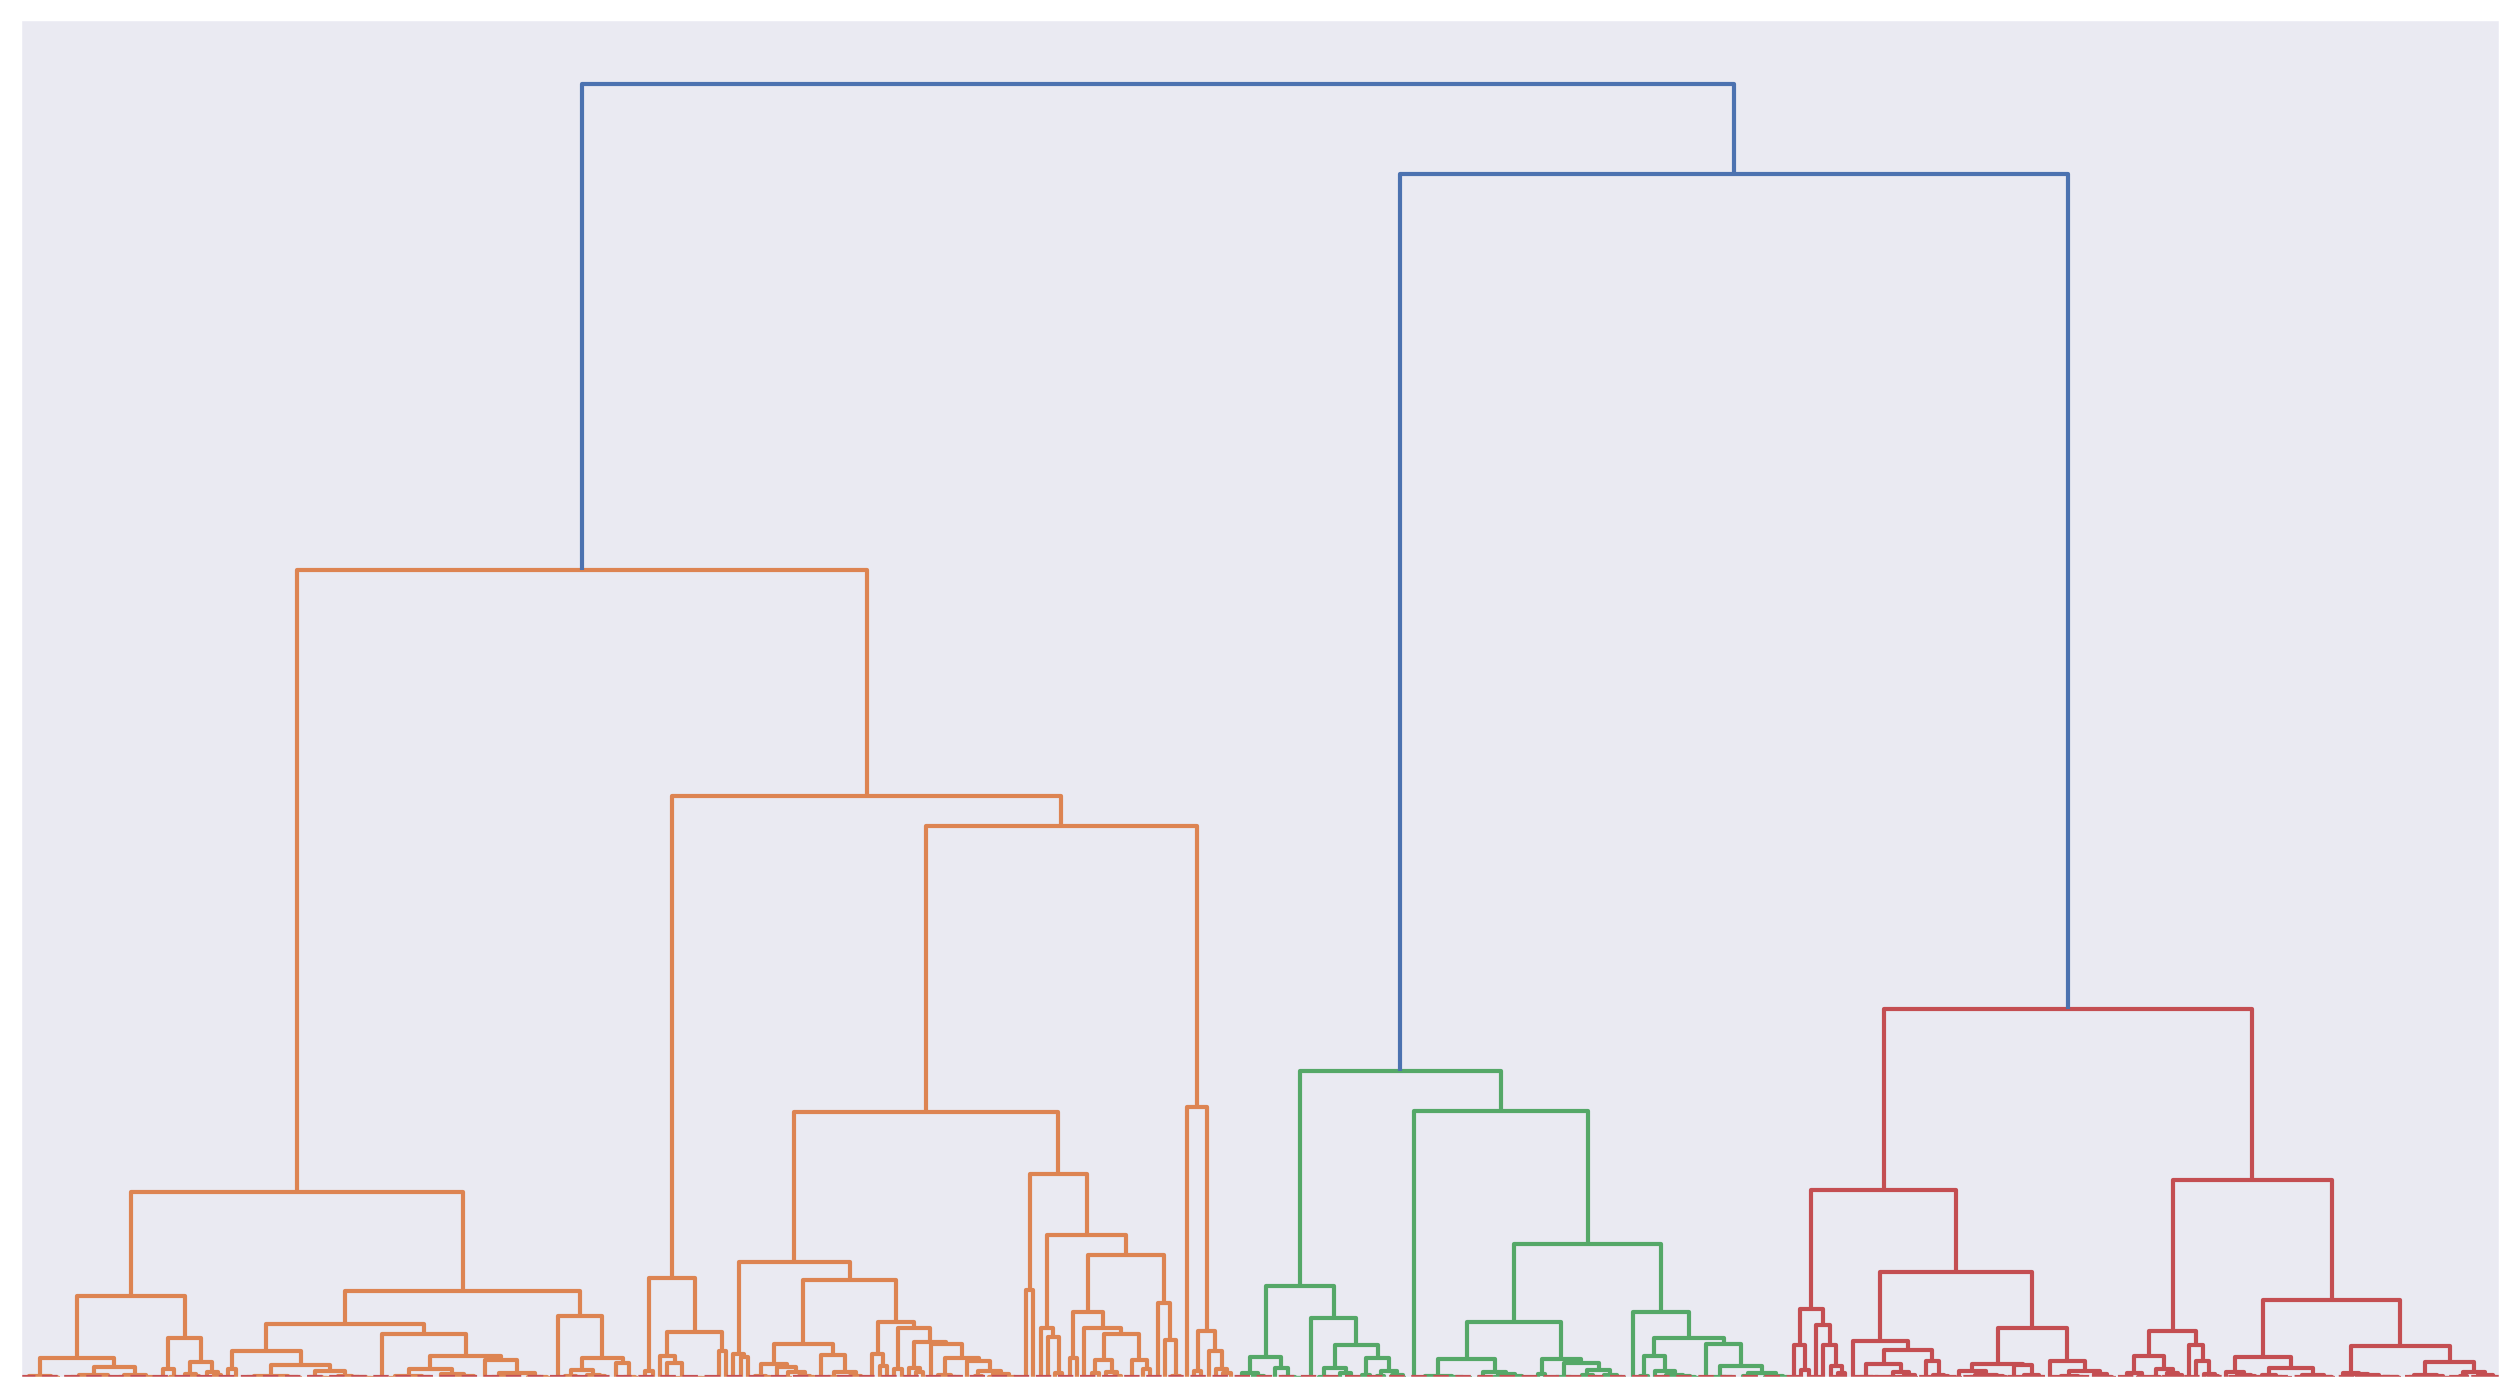

                    field   workplace  home(other)  home(placeforwork)  \
user_id date                                                             
2       2021-01-14    0.0  121.883333          0.0                 0.0   
        2021-01-15    0.0  235.800000          0.0                 0.0   
        2021-01-20    0.0  151.933333          0.0                 0.0   
        2021-01-22    0.0  254.516667          0.0                 0.0   
        2021-01-28    0.0  293.750000          0.0                 0.0   

                    home(living)  workspace_outside  store/outside  \
user_id date                                                         
2       2021-01-14           0.0                0.0      11.000000   
        2021-01-15           0.0                0.0       0.000000   
        2021-01-20           0.0                0.0      86.183333   
        2021-01-22           0.0                0.0     110.266667   
        2021-01-28           0.0                0.0      41.1

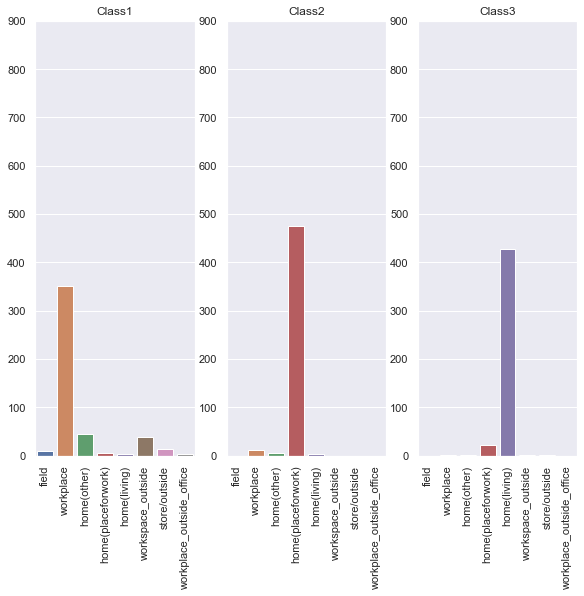

In [423]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
layered_cluster_all = cluster_data_w[[ 'user_id','date',
# 'meals','working_alone', 'hobbies/breaks', 'housework/childcare', 'breaks(induty)', 'travel', 'web_conference', 'other', 'non_work','facettoface_meetings', 'collaborative_work', 'telephone(conference)',
# 'manager_and_operator','manager','collaborators','operator/paticipants',
# 'standardized_tasks','non_standardized_tasks','core_tasks','noncore_tasks','management_tasks','sales_tasks','office_tasks','field_tasks','development_tasks','planning_tasks','manager_tasks',

'field','workplace','home(other)','home(placeforwork)','home(living)','workspace_outside','store/outside','workplace_outside_office',

# 'extremely_uncomfortable','uncomfortable','neither','comfortable','very_comfortable',

# 'alone','with_others(colleagues_and)','with_others(nointeraction)','with_others(colleagues)','with_others(family)',
# 'positive_score_x','depressive_score_x', 'anxious_score_x'
]].groupby(['user_id','date']).mean()

#全データが0の行を除外
# layered_cluster_all=layered_cluster_all[(layered_cluster_all['alone']!=0)
#                     |(layered_cluster_all['with_others(colleagues_and)']!=0)
#                     |(layered_cluster_all['with_others(colleagues)']!=0)
#                     |(layered_cluster_all['with_others(family)']!=0)
#                     |(layered_cluster_all['with_others(nointeraction)']!=0)]
# layered_cluster_all=layered_cluster_all[(layered_cluster_all['standardized_tasks']!=0)
#                     |(layered_cluster_all['non_standardized_tasks']!=0)
#                     |(layered_cluster_all['core_tasks']!=0)
#                     |(layered_cluster_all['noncore_tasks']!=0)
#                     |(layered_cluster_all['management_tasks']!=0)
#                     |(layered_cluster_all['sales_tasks']!=0)
#                     |(layered_cluster_all['office_tasks']!=0)
#                     |(layered_cluster_all['field_tasks']!=0)
#                     |(layered_cluster_all['development_tasks']!=0)
#                     |(layered_cluster_all['planning_tasks']!=0)
#                     |(layered_cluster_all['manager_tasks']!=0)
#                     ]
# layered_cluster_all=layered_cluster_all[(layered_cluster_all['extremely_uncomfortable']!=0)
#                     |(layered_cluster_all['uncomfortable']!=0)
#                     |(layered_cluster_all['neither']!=0)
#                     |(layered_cluster_all['comfortable']!=0)
#                     |(layered_cluster_all['very_comfortable']!=0)
#                     ]
layered_cluster_all=layered_cluster_all[(layered_cluster_all['field']!=0)
                    |(layered_cluster_all['workplace']!=0)
                    |(layered_cluster_all['home(other)']!=0)
                    |(layered_cluster_all['home(placeforwork)']!=0)
                    |(layered_cluster_all['home(living)']!=0)
                    |(layered_cluster_all['workspace_outside']!=0)
                    |(layered_cluster_all['store/outside']!=0)
                    |(layered_cluster_all['workplace_outside_office']!=0)
                    ]
# layered_cluster_all=layered_cluster_all[(layered_cluster_all['manager_and_operator']!=0)
#                     |(layered_cluster_all['manager']!=0)
#                     |(layered_cluster_all['collaborators']!=0)
#                     |(layered_cluster_all['operator/paticipants']!=0)
#                     ]

# 階層型クラスタリングの実施
# ウォード法 x ユークリッド距離
linkage_result = linkage(layered_cluster_all, method='ward', metric='euclidean')

# クラスター分けするしきい値を決める
nkage_result = linkage(layered_cluster_all, method='ward', metric='euclidean')

# クラスター分けするしきい値を決める
threshold = 0.7 * np.max(linkage_result[:, 2])
# 階層型クラスタリングの可視化
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=layered_cluster_all.index, color_threshold=threshold)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.axhline(7, linestyle='--', color='r')
plt.show()

# クラスタリング結果の値を取得
clustered = fcluster(linkage_result, threshold, criterion='distance')
# クラスタリング結果を確認
# print(clustered)

# テーブル全体を正規化
# def minmax_norm(df):
#     return (df - df.min()) / (df.max() - df.min())
# c = minmax_norm(layered_cluster_all)

# 階層クラスター分析の結果をDataFrame化
_class = pd.DataFrame({'class':clustered}, index= layered_cluster_all.index)
_class.head()

# 元データと分析結果を結合
layered_cluster_all_class = pd.concat([layered_cluster_all, _class] ,axis=1)
print(layered_cluster_all_class.head())

# 各セグメントの数を確認 
print(layered_cluster_all_class.groupby('class').size())

# セグメントごとにすべての商品カテゴリの平均値を算出
cluster_stats = np.round(layered_cluster_all_class.groupby('class', as_index=False).mean() ,2)
cluster_stats.head()

# グラフ描画のために、縦長のデータ形式に変換
mat_melt = pd.melt(cluster_stats, id_vars='class', var_name='Category',value_name='Rate')
mat_melt.head()

# セグメントの特徴をグラフにする
groups = mat_melt.groupby('class')
fig = plt.figure(figsize =(20,8))

for name, group in groups:
    _ax = fig.add_subplot(1, 6, int(name))
    sns.barplot(x='Category',y='Rate', data=group , ax=_ax)
    plt.title('Class' + str(name))
    plt.ylabel("")
    plt.xlabel("")
    plt.xticks(rotation=90)
    plt.ylim(0, 900)





In [424]:
mental_merged = layered_cluster_all_class.reset_index()
night_merged = pd.merge(mental_merged, merge_night_w,on=['user_id','date'])
merge_mor = pd.read_csv('./clustering_data/merge_mor.csv')
mor_merged = pd.merge(mental_merged, merge_mor, on=['user_id','date'])

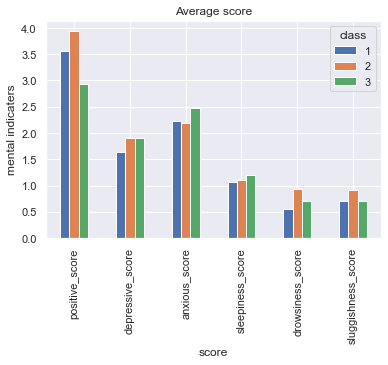

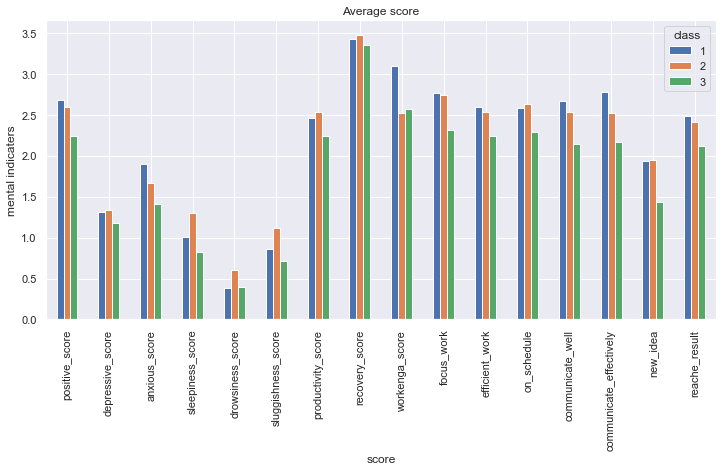

In [425]:
mor_mental = mor_merged[['class','positive_score','depressive_score','anxious_score', 'sleepiness_score','drowsiness_score','sluggishness_score']]
mor_mental.groupby('class').mean().T.plot.bar()
ax = fig.add_subplot(1, 1, 1)
plt.title('Average score')
plt.ylabel('mental indicaters')
plt.xlabel('score')
plt.show()

night_mental = night_merged[['class','positive_score','depressive_score','anxious_score', 'sleepiness_score','drowsiness_score','sluggishness_score','productivity_score','recovery_score','workenga_score','focus_work','efficient_work','on_schedule','communicate_well','communicate_effectively','new_idea','reache_result']]
night_mental.groupby('class').mean().T.plot.bar(figsize=(12,5.5))
# ax = fig.add_subplot(1, 2, 2)
plt.title('Average score')
plt.ylabel('mental indicaters')
plt.xlabel('score')
plt.show()

<ipython-input-426-18db496e91ad>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  night_mental['morning'] = 0
<ipython-input-426-18db496e91ad>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mor_mental['morning'] = 1


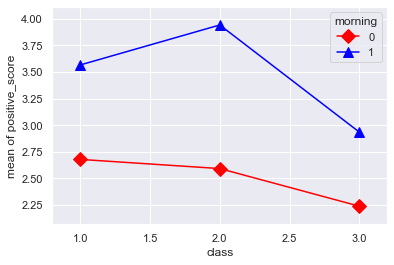

In [426]:
# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

    # 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova # 分散分析やるライブラリ
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukeyの多重比較やるライブラリ

from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

    # 表示桁数の指定
%precision 3

    # グラフをjupyter notebook内に表示させるための指定
%matplotlib inline
# cluster_data.loc[cluster_data['working_alone']>1000, 'working_alone']=1000
# cluster_data
# ['hobbies/breaks']
# night_merged['anxious_score'].plot.box()
# cluster_data[cluster_data['working_alone']>1000]
night_mental['morning'] = 0
mor_mental['morning'] = 1
anova2_mental = pd.concat([mor_mental, night_mental[['class','positive_score','depressive_score','anxious_score','sleepiness_score','drowsiness_score','sluggishness_score','morning']]])

fig = interaction_plot(anova2_mental['class'], anova2_mental['morning'], anova2_mental['positive_score'], # (横軸にする要因（水準多い方），系列にする要因（水準少ない方），評価指標)
             colors=['red','blue'], markers=['D','^'], ms=10)



In [461]:
#二元配置分散分析
mental_indicaters = ['positive_score','depressive_score','anxious_score','sleepiness_score','drowsiness_score','sluggishness_score']
mental_indicaters_night = ['positive_score','depressive_score','anxious_score','sleepiness_score','drowsiness_score','sluggishness_score','productivity_score','recovery_score','workenga_score','focus_work','efficient_work','on_schedule','communicate_well','communicate_effectively','new_idea','reache_result']

night_mental = night_mental.rename(columns={'class':'Class'})

for i in range(len(mental_indicaters)):
    anova2_mental=anova2_mental.rename(columns={'class':'Class'})
    formula = '{} ~ (morning) + (Class) + (morning):(Class)'.format(mental_indicaters[i])
    model = ols(formula, anova2_mental).fit()
    aov_table = anova_lm(model, typ=2)
    aov_table.columns = ["平方和","自由度","F値","p値"] #列名を日本語に差し替え
    print(mental_indicaters[i]+'---------------------二元配置----------------------------')
    print(aov_table) #被験者間効果の検定結果を出力
    
def anova(df, mental_indicaters):
#一元配置分散分析
    df = df.dropna()
    for j in range(len(mental_indicaters)):
        result = scipy.stats.f_oneway(df[df['Class']==1][mental_indicaters[j]],df[df['Class']==2][mental_indicaters[j]],df[df['Class']==3][mental_indicaters[j]])
        print(mental_indicaters[j]+'-----------------------一元配置-----------------------------')
        print(result.pvalue)

anova(mor_mental, mental_indicaters)

positive_score---------------------二元配置----------------------------
                       平方和    自由度         F値            p値
morning         136.541540    1.0  32.323812  2.000113e-08
Class            27.534770    1.0   6.518373  1.091183e-02
morning:Class     0.327247    1.0   0.077470  7.808473e-01
Residual       2652.783869  628.0        NaN           NaN
depressive_score---------------------二元配置----------------------------
                       平方和    自由度         F値        p値
morning          39.292971    1.0  10.464794  0.001281
Class             0.501716    1.0   0.133621  0.714830
morning:Class     5.305196    1.0   1.412919  0.235022
Residual       2358.000136  628.0        NaN       NaN
anxious_score---------------------二元配置----------------------------
                       平方和    自由度         F値        p値
morning          55.302297    1.0  12.812046  0.000371
Class             3.542585    1.0   0.820721  0.365317
morning:Class    14.759992    1.0   3.419491  0.064901
Resid

In [452]:
# plt.figure(figsize=(50, 10))
# sns.violinplot(data=mor_merged, x='user_id', y='productivity_score')
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
# 最小二乗法 ols 実行。 正直あまり、ここで何故登場するのか意味がわかっておりません。
mor_mental = mor_mental.rename(columns={'class':'Class'})   
mod = ols('anxious_score ~ Class', data=mor_mental).fit()                
aov_table = sm.stats.anova_lm(mod, typ=2) # The type of Anova test to perform. See notes.
print(aov_table)


NameError: name 'st' is not defined

In [458]:
night_mental

,Class,positive_score,depressive_score,anxious_score,sleepiness_score,drowsiness_score,sluggishness_score,productivity_score,recovery_score,workenga_score,focus_work,efficient_work,on_schedule,communicate_well,communicate_effectively,new_idea,reache_result,morning
0,1,2.333333,0.000000,0.000000,0.0,0.0,0.2,2.00,5.5,1.666667,3.0,3.0,3.0,3.0,3.0,1.0,3.0,0
1,1,3.000000,0.000000,0.000000,0.0,0.0,0.2,2.25,4.5,4.666667,3.0,3.0,3.0,4.0,4.0,1.0,3.0,0
2,1,3.333333,0.000000,0.000000,0.0,0.0,0.4,2.75,4.5,4.000000,3.0,3.0,4.0,3.0,3.0,1.0,3.0,0
3,1,3.333333,0.000000,0.000000,0.6,0.0,0.4,2.00,5.0,2.333333,3.0,3.0,3.0,3.0,3.0,1.0,3.0,0
4,1,3.000000,0.000000,1.333333,0.0,0.0,0.0,2.00,5.5,2.000000,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2,4.000000,1.000000,0.666667,0.4,0.2,0.2,3.50,6.0,3.333333,3.0,3.0,3.0,2.0,2.0,3.0,2.0,0
373,2,4.333333,0.333333,0.000000,1.2,0.0,0.0,3.00,5.5,2.666667,3.0,3.0,4.0,2.0,2.0,2.0,2.0,0
374,3,3.666667,0.000000,0.333333,0.4,0.0,0.0,3.25,6.0,4.000000,2.0,1.0,1.0,1.0,2.0,2.0,2.0,0
375,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,2.0,1.0,2.0,0


# リモートワークvsオフィスワーク　比較

In [333]:
workspace_df = cluster_data
# どこで働いたかを示すカラムを追加
workspace_df[['homework','officework','outside_space']] = 0
workspace_df.loc[(workspace_df['home(other)']>1)|(workspace_df['home(placeforwork)']>1)|(workspace_df['home(living)']>1),'homework'] = 1
workspace_df.loc[(workspace_df['workplace']>1)|(workspace_df['field']>1),'officework'] = 1
workspace_df.loc[(workspace_df['workspace_outside']>1)|(workspace_df['store/outside']>1), 'outside_space'] = 1


In [334]:
# print(workspace_df['homework'].value_counts())
# print(workspace_df['officework'].value_counts())
# print(workspace_df['outside_space'].value_counts())
homework_df = workspace_df.query('homework == 1')
officework_df = workspace_df.query('officework == 1')
outside_df = workspace_df.query('outside_space == 1')

Text(0.5, 1.0, 'Comparison by place of work')

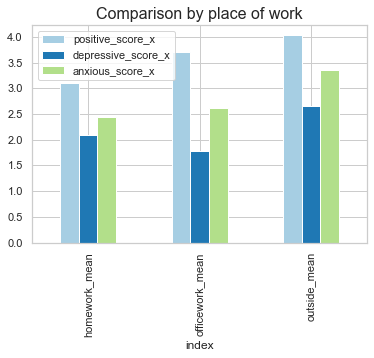

In [335]:
homework_mean = homework_df.describe()[['positive_score_x','depressive_score_x', 'anxious_score_x']].reset_index().query('index == "mean"').replace({'mean':'homework_mean'})
officework_mean = officework_df.describe()[['positive_score_x','depressive_score_x', 'anxious_score_x']].reset_index().query('index == "mean"').replace({'mean':'officework_mean'})
outside_mean = outside_df.describe()[['positive_score_x','depressive_score_x', 'anxious_score_x']].reset_index().query('index == "mean"').replace({'mean':'outside_mean'})
df_concat = pd.concat([homework_mean, officework_mean])
df_concat = pd.concat([df_concat, outside_mean])
df_concat = df_concat.set_index('index')
df_concat.plot.bar()
plt.title(u'Comparison by place of work', size=16)

In [346]:
import scipy
result = scipy.stats.f_oneway(homework_df['positive_score_x'],officework_df['positive_score_x'],outside_df['positive_score_x'])
print(result.pvalue)

0.030955791510226253


In [340]:
homework_df['positive_score_x']

45     2.666667
46     1.000000
49     2.333333
50     3.333333
51     0.333333
         ...   
880    4.000000
881    7.000000
887    4.000000
889    4.000000
895    5.666667
Name: positive_score_x, Length: 204, dtype: float64